Import library yang di butuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Input Data

1. Data Train

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (4).csv


In [ ]:
dataTrain = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
dataTrain

ID  Provinsi  KodeKabKot  Y  X1  ...  X6     Z1      Z2      Z3       Z4
0          1        11        1101  0   1  ...   1  1.077  15.075  26.919  390.869
1          2        11        1101  0   1  ...   0  1.077  15.075  26.919  390.869
2          4        11        1101  0   0  ...   1  1.077  15.075  26.919  390.869
3          7        11        1101  0   0  ...   1  1.077  15.075  26.919  390.869
4          8        11        1101  0   1  ...   0  1.077  15.075  26.919  390.869
...      ...       ...         ... ..  ..  ...  ..    ...     ...     ...      ...
13621  19524        94        9471  1   0  ...   1  1.757   3.262  48.936  209.045
13622  19526        94        9471  0   1  ...   1  1.757   3.262  48.936  209.045
13623  19527        94        9471  0   0  ...   1  1.757   3.262  48.936  209.045
13624  19529        94        9471  0   0  ...   1  1.757   3.262  48.936  209.045
13625  19530        94        9471  1   0  ...   1  1.757   3.262  48.936  209.045

[13626 rows x 14 columns]

2. Data Test

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test (4).csv


In [ ]:
dataTest = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
dataTest

ID  Provinsi  KodeKabKot  X1  X2  ...  X6     Z1      Z2      Z3       Z4
0         3        11        1101   1  39  ...   1  1.077  15.075  26.919  390.869
1         5        11        1101   0  32  ...   1  1.077  15.075  26.919  390.869
2         6        11        1101   1  32  ...   1  1.077  15.075  26.919  390.869
3        10        11        1101   1  28  ...   0  1.077  15.075  26.919  390.869
4        17        11        1101   0  31  ...   1  1.077  15.075  26.919  390.869
...     ...       ...         ...  ..  ..  ...  ..    ...     ...     ...      ...
5901  19515        94        9471   1  39  ...   1  1.757   3.262  48.936  209.045
5902  19525        94        9471   0  30  ...   1  1.757   3.262  48.936  209.045
5903  19528        94        9471   0  22  ...   1  1.757   3.262  48.936  209.045
5904  19531        94        9471   0  40  ...   1  1.757   3.262  48.936  209.045
5905  19532        94        9471   0  38  ...   1  1.757   3.262  48.936  209.045

[5906 rows x 13 columns]

Pengecekan Struktur Data

In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626 entries, 0 to 13625
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          13626 non-null  int64  
 1   Provinsi    13626 non-null  int64  
 2   KodeKabKot  13626 non-null  int64  
 3   Y           13626 non-null  int64  
 4   X1          13626 non-null  int64  
 5   X2          13626 non-null  int64  
 6   X3          13626 non-null  int64  
 7   X4          13626 non-null  int64  
 8   X5          13626 non-null  int64  
 9   X6          13626 non-null  int64  
 10  Z1          13626 non-null  float64
 11  Z2          13626 non-null  float64
 12  Z3          13626 non-null  float64
 13  Z4          13621 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.5 MB


In [ ]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          5906 non-null   int64  
 1   Provinsi    5906 non-null   int64  
 2   KodeKabKot  5906 non-null   int64  
 3   X1          5906 non-null   int64  
 4   X2          5906 non-null   int64  
 5   X3          5906 non-null   int64  
 6   X4          5906 non-null   int64  
 7   X5          5906 non-null   int64  
 8   X6          5906 non-null   int64  
 9   Z1          5906 non-null   float64
 10  Z2          5906 non-null   float64
 11  Z3          5906 non-null   float64
 12  Z4          5901 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 600.0 KB


Pengecekan Missing Data

In [ ]:
dataTrain.isnull().sum()

ID            0
Provinsi      0
KodeKabKot    0
Y             0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
Z1            0
Z2            0
Z3            0
Z4            5
dtype: int64

In [ ]:
dataTest.isnull().sum()

ID            0
Provinsi      0
KodeKabKot    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
Z1            0
Z2            0
Z3            0
Z4            5
dtype: int64

Inisialisasi Missing Data

In [ ]:
dataTrain = dataTrain.dropna(axis=0)
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13621 entries, 0 to 13625
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          13621 non-null  int64  
 1   Provinsi    13621 non-null  int64  
 2   KodeKabKot  13621 non-null  int64  
 3   Y           13621 non-null  int64  
 4   X1          13621 non-null  int64  
 5   X2          13621 non-null  int64  
 6   X3          13621 non-null  int64  
 7   X4          13621 non-null  int64  
 8   X5          13621 non-null  int64  
 9   X6          13621 non-null  int64  
 10  Z1          13621 non-null  float64
 11  Z2          13621 non-null  float64
 12  Z3          13621 non-null  float64
 13  Z4          13621 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.6 MB


In [ ]:
rata2 = dataTest['Z4'].mean()
dataTest['Z4'] = dataTest['Z4'].fillna(rata2)
dataTest['Z4'].isna().sum()

0

In [ ]:
dataTes = dataTest.drop(['ID', 'Provinsi'], axis=1)

Menampilkan Deskripsi Data

In [ ]:
dataTes.describe()

KodeKabKot           X1  ...           Z3           Z4
count  5906.000000  5906.000000  ...  5906.000000  5906.000000
mean   4474.883678     0.599221  ...    35.871193   195.885574
std    2602.043360     0.490098  ...    34.409927   130.837189
min    1101.000000     0.000000  ...     0.861000    20.183000
25%    1805.000000     0.000000  ...    16.744000   104.361750
50%    3522.000000     1.000000  ...    25.318000   159.925000
75%    7111.000000     1.000000  ...    39.434000   257.738000
max    9471.000000     1.000000  ...   291.322000  1400.875000

[8 rows x 11 columns]

In [ ]:
dataTrain.describe()

ID      Provinsi  ...            Z3            Z4
count  13621.000000  13621.000000  ...  13621.000000  13621.000000
mean    9759.659056     44.544453  ...     35.610433    197.945368
std     5652.328172     26.365098  ...     33.103205    137.404420
min        1.000000     11.000000  ...      1.973000     20.183000
25%     4865.000000     18.000000  ...     16.744000    102.438000
50%     9769.000000     35.000000  ...     25.896000    163.192000
75%    14648.000000     71.000000  ...     39.854000    257.738000
max    19530.000000     94.000000  ...    291.322000   1400.875000

[8 rows x 14 columns]

Pengecekan Imbalance Data

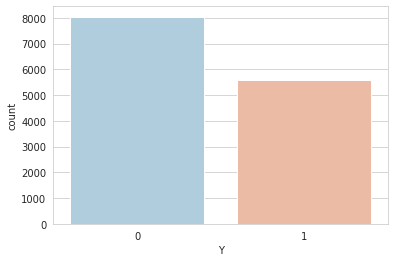

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=dataTrain['Y'], data=dataTrain, palette='RdBu_r')

Membangun Model SVM

In [ ]:
X = dataTrain.drop(['Y', 'ID', 'Provinsi'], axis=1)
Y = dataTrain['Y']

1. Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=0)

2. Scalling Data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
dataTes = sc.transform(dataTes)

3. SVM Model

In [ ]:
model = SVC(random_state=0)

In [ ]:
model.fit(X_train, y_train)

SVC(random_state=0)

Prediksi dan Evaluasi Model

In [ ]:
from sklearn.datasets import make_classification
y_pred = model.predict(X_test)

Menampilkan Confusion Matrix

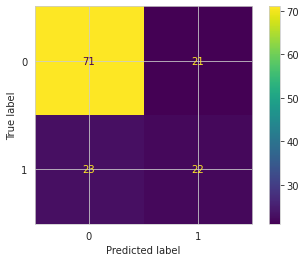

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Menghitung Akurasi, Presisi, Recall, dan F1-Score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        92
           1       0.51      0.49      0.50        45

    accuracy                           0.68       137
   macro avg       0.63      0.63      0.63       137
weighted avg       0.68      0.68      0.68       137



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average='weighted'), ": is the precision score")

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred, average='weighted'), ": is the recall score")

from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'), ": is the f1 score")

[[71 21]
 [23 22]] : is the confusion matrix
0.6788321167883211 : is the accuracy score
0.6752745804093515 : is the precision score
0.6788321167883211 : is the recall score
0.6769091908013499 : is the f1 score


Submission

In [ ]:
Y = model.predict(dataTes)
print(Y)

[0 0 0 ... 0 0 0]


In [ ]:
ID = dataTest['ID']
ID.head()

0     3
1     5
2     6
3    10
4    17
Name: ID, dtype: int64

In [ ]:
colm = {'ID': ID,
        'Y': Y
        }

df = pd.DataFrame(colm, columns= ['ID', 'Y'])

df.to_csv ('3SI2_221911157_Rizka.csv', index = False, header=True)

print (df)

         ID  Y
0         3  0
1         5  0
2         6  0
3        10  0
4        17  0
...     ... ..
5901  19515  0
5902  19525  0
5903  19528  0
5904  19531  0
5905  19532  0

[5906 rows x 2 columns]


In [ ]:
files.download('3SI2_221911157_Rizka.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>